In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Polygon, Point
from itertools import chain
import geoplot
import shapely
import gstools as gs
import numpy as np
import matplotlib.patches as mpatches
import os


In [3]:
lme = pd.read_pickle("seaweed_growth_rate_LME.pkl")
lme

months_since_war          -3            -2            -1             0    \
1                 5.557874e-06  1.182461e-05  2.000461e-05  2.224793e-05   
2                 8.821785e-04  1.156281e-03  1.100037e-03  2.916141e-03   
3                 1.223721e-01  1.029887e-01  7.296291e-02  4.837248e-02   
4                 2.066917e-01  9.550440e-02  5.176389e-03  2.727886e-02   
5                 2.061257e-01  9.112200e-02  2.781794e-02  2.591535e-02   
..                         ...           ...           ...           ...   
62                4.447787e-03  2.012904e-03  1.620924e-03  5.710396e-03   
63                1.305007e-07  1.858516e-07  5.588383e-07  1.175540e-06   
64                6.954079e-12  1.359707e-09  1.417805e-08  5.951716e-08   
65                1.217425e-04  2.046702e-04  3.325498e-04  6.256496e-04   
66                1.150209e-11  2.084798e-09  1.799095e-08  5.794589e-08   

months_since_war           1             2             3             4    \
1                 1.917209e-06  1.170857e-06  5.470735e-07  1.013222e-07   
2                 2.016080e-04  2.113582e-04  1.549855e-04  5.416070e-05   
3                 6.147680e-02  5.117198e-02  5.606188e-02  4.919156e-02   
4                 2.778467e-01  3.101475e-01  3.102212e-01  2.971572e-01   
5                 1.042900e-01  1.582914e-01  2.665674e-01  2.164532e-01   
..                         ...           ...           ...           ...   
62                1.955242e-03  1.758122e-03  1.211194e-03  7.050217e-04   
63                8.463860e-09  4.729529e-09  1.820745e-09  5.459091e-10   
64                1.086806e-10  1.117788e-10  2.157771e-11  2.141996e-12   
65                3.093876e-05  2.307046e-05  1.512317e-05  3.571079e-06   
66                1.797605e-10  1.590380e-10  3.744480e-11  9.547752e-12   

months_since_war           5             6    ...           227           228  \
1                 2.334524e-08  1.687891e-09  ...  4.023737e-06  5.245419e-06   
2                 2.024098e-05  3.207467e-06  ...  4.517901e-04  7.335106e-04   
3                 3.547154e-02  1.630725e-02  ...  3.673044e-02  8.918860e-03   
4                 3.026310e-01  1.049813e-01  ...  3.193429e-03  3.735796e-03   
5                 1.647951e-01  3.552877e-02  ...  2.233928e-02  4.433303e-03   
..                         ...           ...  ...           ...           ...   
62                1.313020e-04  4.759383e-05  ...  1.730038e-03  3.044258e-03   
63                9.667911e-11  2.913193e-11  ...  1.576672e-07  8.444213e-07   
64                1.892925e-13  8.784971e-21  ...  6.471531e-09  5.927095e-08   
65                8.948428e-07  4.914046e-08  ...  2.656491e-05  3.941982e-05   
66                5.791067e-13  1.148461e-17  ...  8.848514e-09  8.422736e-08   

months_since_war           229           230           231           232  \
1                 1.342673e-05  7.886804e-05  3.212005e-04  3.724120e-04   
2                 9.715186e-04  7.069179e-04  6.884360e-04  4.096309e-03   
3                 0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
4                 3.523527e-03  3.861485e-03  3.656449e-03  3.369491e-03   
5                 0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
..                         ...           ...           ...           ...   
62                7.053886e-03  1.035166e-02  9.857748e-03  7.731463e-03   
63                2.533721e-06  9.506315e-06  5.493298e-05  4.181746e-05   
64                3.158803e-07  5.303518e-07  7.084643e-07  1.167304e-07   
65                1.480646e-04  6.850047e-04  2.283108e-03  1.913890e-03   
66                3.400142e-07  4.553957e-07  6.793274e-07  7.658053e-08   

months_since_war           233           234           235           236  
1                 1.187437e-04  7.627819e-06  1.428334e-06  3.511791e-06  
2                 5.216419e-03  9.840015e-04  2.395164e-04  5.431172e-04  
3                 1.536701e-02  7.299258e-02  9.359877e-02  1.3

In [21]:
global_or_US = "global"
growth_df_global = gpd.GeoDataFrame(
    pd.read_pickle(
        "seaweed_growth_rate_clustered_" + global_or_US + ".pkl"
    )
)

In [22]:
growth_df_global

months_since_war             -3        -2            -1             0  \
-78.152090 194.562505  0.000011  0.000007  1.080906e-06  4.340751e-08   
           195.687505  0.000014  0.000011  1.888677e-06  5.606738e-08   
           196.812505  0.000015  0.000012  2.335622e-06  5.815494e-08   
           197.937506  0.000016  0.000012  2.053414e-06  4.234192e-08   
           320.562509  0.000002  0.000001  9.279054e-08  1.242968e-10   
...                         ...       ...           ...           ...   
 89.616591 183.608458  0.000000  0.000000  2.971729e-10  9.621325e-09   
 89.663855 334.470704  0.000000  0.000000  3.767500e-10  1.093077e-08   
           305.529436  0.000000  0.000000  3.742607e-10  1.071672e-08   
 89.706409 122.527067  0.000000  0.000000  3.408817e-10  9.886951e-09   
 89.706410 157.472790  0.000000  0.000000  3.198583e-10  9.654595e-09   

months_since_war                  1             2             3             4  \
-78.152090 194.562505  0.000000e+00  0.000000e+00  0.000000e+00  2.872584e-11   
           195.687505  0.000000e+00  0.000000e+00  0.000000e+00  4.123149e-11   
           196.812505  0.000000e+00  0.000000e+00  0.000000e+00  5.187178e-11   
           197.937506  0.000000e+00  0.000000e+00  0.000000e+00  1.473226e-10   
           320.562509  0.000000e+00  0.000000e+00  0.000000e+00  1.713758e-14   
...                             ...           ...           ...           ...   
 89.616591 183.608458  4.000441e-08  4.860006e-11  3.434996e-11  8.758652e-12   
 89.663855 334.470704  4.828565e-08  5.368022e-11  5.413988e-11  1.067863e-11   
           305.529436  4.775904e-08  5.703088e-11  4.555200e-11  9.286521e-12   
 89.706409 122.527067  4.042983e-08  4.184417e-11  3.622149e-11  1.025945e-11   
 89.706410 157.472790  3.972105e-08  4.692853e-11  3.334951e-11  9.374161e-12   

months_since_war                  5             6  ...           108  \
-78.152090 194.562505  1.656558e-08  3.199722e-07  ...  7.684799e-09   
           195.687505  2.117739e-08  3.625968e-07  ...  1.514082e-08   
           196.812505  2.318916e-08  3.446465e-07  ...  1.910014e-08   
           197.937506  2.577637e-08  3.659875e-07  ...  1.740600e-08   
           320.562509  9.819242e-13  1.167511e-11  ...  1.843058e-10   
...                             ...           ...  ...           ...   
 89.616591 183.608458  3.237654e-13  0.000000e+00  ...  1.391816e-08   
 89.663855 334.470704  3.672863e-13  0.000000e+00  ...  1.612717e-08   
           305.529436  3.346805e-13  0.000000e+00  ...  1.590135e-08   
 89.706409 122.527067  4.290349e-13  0.000000e+00  ...  1.431736e-08   
 89.706410 157.472790  3.882104e-13  0.000000e+00  ...  1.410699e-08   

months_since_war                109           110           111           112  \
-78.152090 194.562505  0.000000e+00  0.000000e+00  0.000000e+00  1.695093e-11   
           195.687505  0.000000e+00  0.000000e+00  0.000000e+00  4.782390e-11   
           196.812505  0.000000e+00  0.000000e+00  0.000000e+00  1.223867e-10   
           197.937506  0.000000e+00  0.000000e+00  0.000000e+00  2.909292e-10   
           320.562509  0.000000e+00  0.000000e+00  0.000000e+00  1.436959e-12   
...                             ...           ...           ...           ...   
 89.616591 183.608458  1.329644e-07  3.530576e-07  3.399879e-07  2.898518e-07   
 89.663855 334.470704  1.454482e-07  3.631096e-07  2.506540e-07  3.870041e-07   
           305.529436  1.445498e-07  3.696052e-07  2.706320e-07  3.848347e-07   
 89.706409 122.527067  1.356530e-07  3.430645e-07  2.930233e-07  2.997041e-07   
 89.706410 157.472790  1.347699e-07  3.453279e-07  3.142684e-07  2.971347e-07   

months_since_war                113           114           115           116  \
-78.152090 194.562505  4.333771e-08  1.198245e-06  9.928892e-06  5.656922e-05   
           195.687505  6.924070e-08  1.572849e-06  1.059330e-05  6.042587e-05   
           196.812505  6.846431e-08  1.584246e-06  1.071534e-05  6.37

In [23]:
def prepare_geometry(growth_df):
    """
    Prepares the geometry for the growth_df. For some reason the spatial data has
    a longitude that is 0-360 instead of -180 to 180. This function converts it to
    the latter
    """
    growth_df["latlon"] = growth_df.index
    growth_df["latitude"] = growth_df["latlon"].str[0]
    growth_df["longitude"] = growth_df["latlon"].str[1]
    growth_df["longitude"] = growth_df["longitude"].apply(lambda x: x - 360 if x > 180 else x)
    growth_df["geometry"] = growth_df[["longitude", "latitude"]].apply(tuple, axis=1).apply(Point)
    growth_df = growth_df[["cluster", "geometry"]]
    growth_df = gpd.GeoDataFrame(growth_df)
    return growth_df

In [24]:
growth_df_global = prepare_geometry(growth_df_global)
growth_df_global

months_since_war       cluster                      geometry
-78.152090 194.562505        0  POINT (-165.43749 -78.15209)
           195.687505        0  POINT (-164.31249 -78.15209)
           196.812505        0  POINT (-163.18749 -78.15209)
           197.937506        0  POINT (-162.06249 -78.15209)
           320.562509        0   POINT (-39.43749 -78.15209)
...                        ...                           ...
 89.616591 183.608458        0   POINT (-176.39154 89.61659)
 89.663855 334.470704        0    POINT (-25.52930 89.66386)
           305.529436        0    POINT (-54.47056 89.66386)
 89.706409 122.527067        0    POINT (122.52707 89.70641)
 89.706410 157.472790        0    POINT (157.47279 89.70641)

[86212 rows x 2 columns]

In [25]:
growth_df_global.shape

(86212, 2)

In [26]:
growth_df_global[growth_df_global.is_valid].shape

(86212, 2)

In [27]:
growth_df = pd.read_pickle("seaweed_growth_rate_clustered_US.pkl")

# overall mean by cluster
growth_df.groupby("cluster").mean().mean(axis=1)

cluster
0    0.088007
1    0.172486
2    0.071954
3    0.118033
4    0.023120
dtype: float64

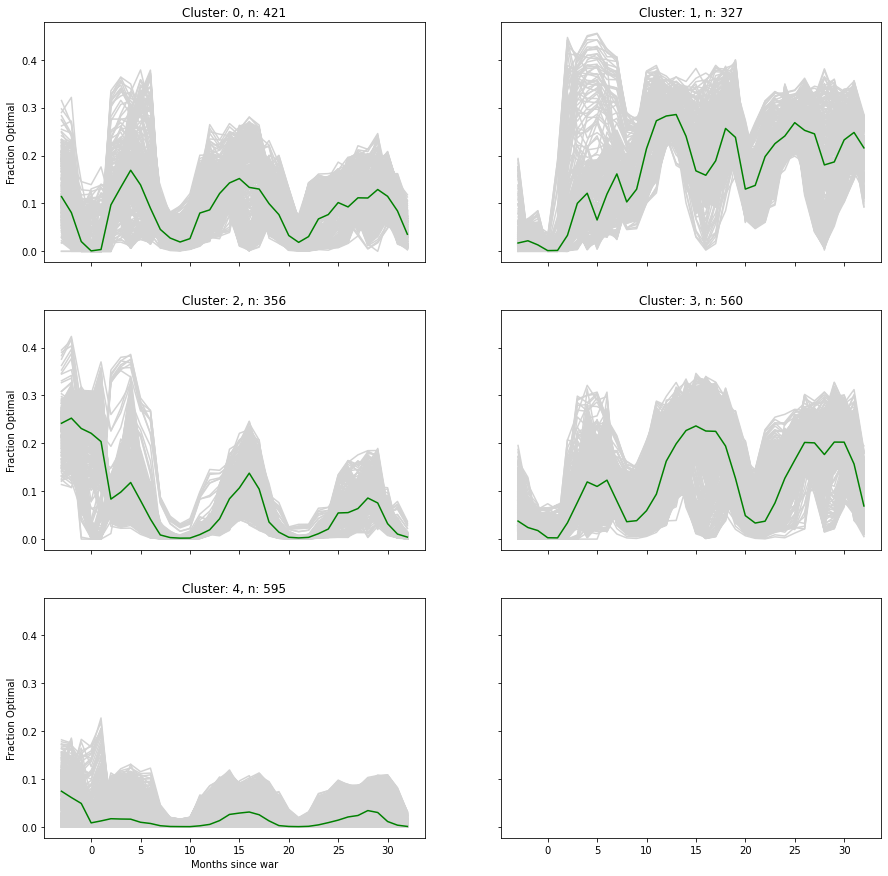

In [28]:
fix, axes = plt.subplots(nrows=3, ncols=2, sharey=True, sharex=True, figsize=(15, 15))

axes = axes.flatten()
for cluster, cluster_df in growth_df.groupby("cluster"):
    del(cluster_df["cluster"])
    ax = axes[cluster]
    cluster_df.transpose().plot(ax=ax, color="lightgrey", legend=False)
    cluster_df.median().transpose().plot(ax=ax, color="green", legend=False)
    ax.set_ylabel("Fraction Optimal")
    ax.set_xlabel("Months since war")
    ax.set_title("Cluster: " + str(cluster) + ", n: " + str(cluster_df.shape[0]))

In [29]:
growth_df["latlon"] = growth_df.index
growth_df['latitude'] = growth_df["latlon"].str[0]
growth_df['longitude'] = growth_df['latlon'].str[1]
growth_df['longitude'] = growth_df[growth_df["longitude"]>180]["longitude"] - 360
#print(growth_df.longitude.min())

In [30]:
growth_df["geometry"] = growth_df[['longitude','latitude']].apply(tuple, axis=1)
growth_df["geometry"] = growth_df["geometry"].apply(Point)
growth_df = growth_df[["cluster", "geometry"]]
growth_df = gpd.GeoDataFrame(growth_df)
growth_df.set_crs(epsg=4326).to_file("clusters_shp/clusters.shp")
growth_df

months_since_war      cluster                     geometry
17.474949 296.964984        1   POINT (-63.03502 17.47495)
17.480288 295.841260        1   POINT (-64.15874 17.48029)
17.485865 294.717527        1   POINT (-65.28247 17.48587)
17.491679 293.593785        1   POINT (-66.40622 17.49168)
17.497726 292.470032        1   POINT (-67.52997 17.49773)
...                       ...                          ...
52.808242 229.511355        4  POINT (-130.48865 52.80824)
52.928145 228.400686        4  POINT (-131.59931 52.92815)
53.342084 229.672963        4  POINT (-130.32704 53.34208)
53.464323 228.563404        4  POINT (-131.43660 53.46432)
53.999976 228.733513        4  POINT (-131.26649 53.99998)

[2259 rows x 2 columns]

In [31]:
buffered = gpd.GeoDataFrame(growth_df.buffer(0.65))
buffered["cluster"] = growth_df["cluster"]
buffered.columns=["geometry", "cluster"]
cluster_dict = {0:"high/low",
               1:"low/medium",
               2:"low/low",
               3:"low/high",
               4:"medium/medium"
               }
buffered["cluster_names"] = buffered["cluster"].map(cluster_dict)


In [32]:
global_map = gpd.read_file("../geospatial_information/Countries/ne_50m_admin_0_countries.shp")


(-130.0, -65.0)

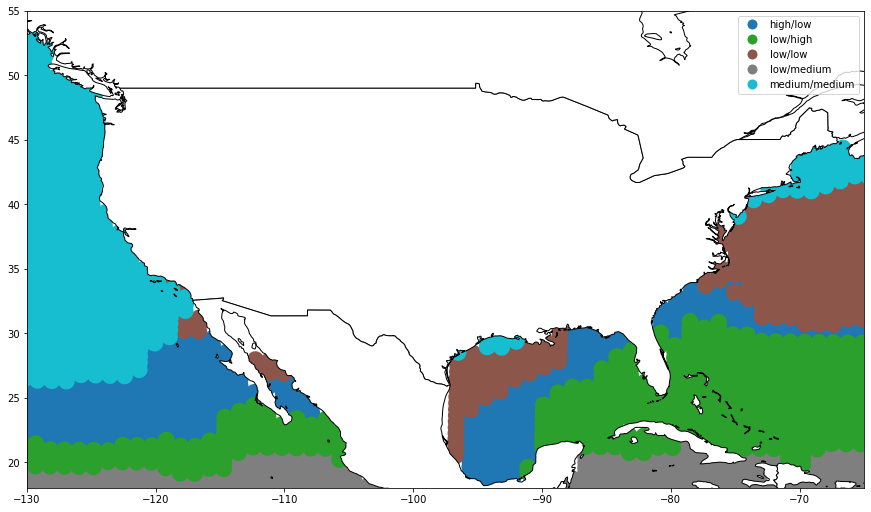

In [33]:
cluster_dissolved = buffered.dissolve(by="cluster")
cluster_dissolved.set_crs(epsg=4326,inplace=True)
cluster_dissolved.to_crs(global_map.crs,inplace=True)
cluster_dissolved["cluster"] = cluster_dissolved.index
ax = cluster_dissolved.plot(column="cluster_names", legend=True)
fig = plt.gcf()
fig.set_size_inches(15,15)
global_map.plot(ax=ax, color="white", edgecolor="black")
ax.set_ylim(18,55)
ax.set_xlim(-130,-65)

In [34]:
growth_df

months_since_war      cluster                     geometry
17.474949 296.964984        1   POINT (-63.03502 17.47495)
17.480288 295.841260        1   POINT (-64.15874 17.48029)
17.485865 294.717527        1   POINT (-65.28247 17.48587)
17.491679 293.593785        1   POINT (-66.40622 17.49168)
17.497726 292.470032        1   POINT (-67.52997 17.49773)
...                       ...                          ...
52.808242 229.511355        4  POINT (-130.48865 52.80824)
52.928145 228.400686        4  POINT (-131.59931 52.92815)
53.342084 229.672963        4  POINT (-130.32704 53.34208)
53.464323 228.563404        4  POINT (-131.43660 53.46432)
53.999976 228.733513        4  POINT (-131.26649 53.99998)

[2259 rows x 2 columns]

In [35]:
growth_df["cluster_names"] = growth_df["cluster"].map(cluster_dict)


In [36]:
eez = gpd.read_file("../geospatial_information/EEZ/eez_boundaries_v11.shp")
eez = eez[eez["SOVEREIGN1"]=="United States"]
eez

LINE_ID                                          LINE_NAME  \
117   1297.0  American Samoa (United States) - Cook Islands ...   
157   1345.0  American Samoa (United States) - Tokelau (New ...   
158   1346.0  American Samoa (United States) - Niue (New Zea...   
171   1369.0            Puerto Rico (United States) - Venezuela   
221   1886.0                  Guam (United States) - Micronesia   
253   1924.0  Howland and Baker islands (United States) - Ph...   
256   1927.0  Jarvis Island (United States) - Line Group (Ki...   
257   1929.0  Palmyra Atoll (United States) - Line Group (Ki...   
285   2067.0  United States Virgin Islands (United States) -...   
336   3649.0               Jarvis Island (United States) 200 NM   
344   3659.0               Palmyra Atoll (United States) 200 NM   
357   3672.0                        Guam (United States) 200 NM   
369   3686.0    Northern Mariana Islands (United States) 200 NM   
408   2049.0                               United States 200 NM   
409   2050.0                               United States 200 NM   
410   2038.0                      Alaska (United States) 200 NM   
411   2041.0                 Puerto Rico (United States) 200 NM   
412   2042.0              Johnston Atoll (United States) 200 NM   
413   2043.0   Howland and Baker islands (United States) 200 NM   
414   2045.0                 Wake Island (United States) 200 NM   
415   2052.0                               United States 200 NM   
417   2051.0                            United States - Bahamas   
524   3827.0  Connection line American Samoa (United States)...   
595   3903.0  Connection line Guam (United States) - Micronesia   
596   3904.0  Connection line Guam (United States) - Micronesia   
638   3948.0                      Connection line United States   
639   3949.0                      Connection line United States   
658   3969.0                      Connection line United States   
660   3971.0                      Connection line United States   
683   3999.0  Connection line Howland and Baker islands (Uni...   
686   4002.0  Connection line American Samoa (United States)...   
695   4013.0                      Connection line United States   
732   3347.0  Puerto Rico (United States) - United States Vi...   
825   3454.0             American Samoa (United States) - Tonga   
828   3457.0             American Samoa (United States) - Samoa   
838   3468.0  Guam (United States) - Northern Mariana Island...   
841   3471.0   Northern Mariana Islands (United States) - Japan   
941   3584.0             American Samoa (United States) - Samoa   
958   3602.0  Puerto Rico (United States) - Overlapping clai...   
965   2039.0                      Hawaii (United States) 200 NM   

                         LINE_TYPE  MRGID_SOV1  MRGID_TER1  \
117                         Treaty      2204.0      8670.0   
157                         Treaty      2204.0      8670.0   
158                         Treaty      2204.0      8670.0   
171                         Treaty      2204.0      8641.0   
221                         Treaty      2204.0      8599.0   
253                         Treaty      2204.0     48684.0   
256                         Treaty      2204.0      8668.0   
257                         Treaty      2204.0      8669.0   
285                         Treaty      2204.0      8642.0   
336                         200 NM      2204.0      8668.0   
344                         200 NM      2204.0      8669.0   
357                         200 NM      2204.0      8599.0   
369                         200 NM      2204.0      8598.0   
408                         200 NM      2204.0      2204.0   
409                         200 NM      2204.0      2204.0   
410                         200 NM      2204.0      8684.0   
411                      Unsettled      2204.0      8641.0   
412                         200 NM      2204.0      8678.0   
413                         200 NM      2204.0     48684.0   
414              

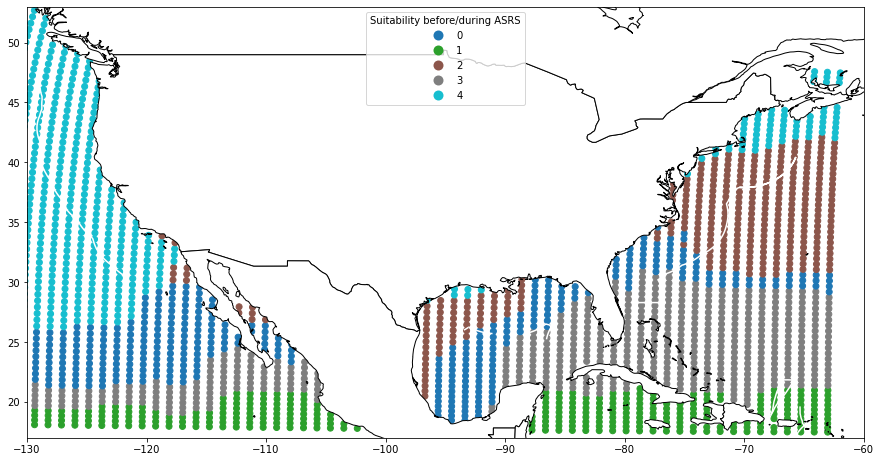

In [46]:
growth_df["cluster"] = growth_df["cluster"].astype(str)
growth_df.set_crs(epsg=4326,inplace=True)
growth_df.to_crs(global_map.crs,inplace=True)
#ax = geoplot.voronoi(growth_df, hue="cluster_names", legend=True, linewidth=0.1)
ax = growth_df.plot(column="cluster", legend=True)
legend = ax.get_legend()
legend.set_title("Suitability before/during ASRS")
legend.set_facecolor="white"
fig = plt.gcf()
fig.set_size_inches(15,15)
eez.to_crs(global_map.crs).plot(ax=ax,facecolor="none", edgecolor='white', lw=1.5)
global_map.plot(ax=ax, color="white", edgecolor="black")
ax.set_ylim(17,53)
ax.set_xlim(-130,-60)
plt.savefig("clusters_US.png", dpi=300, bbox_inches="tight")

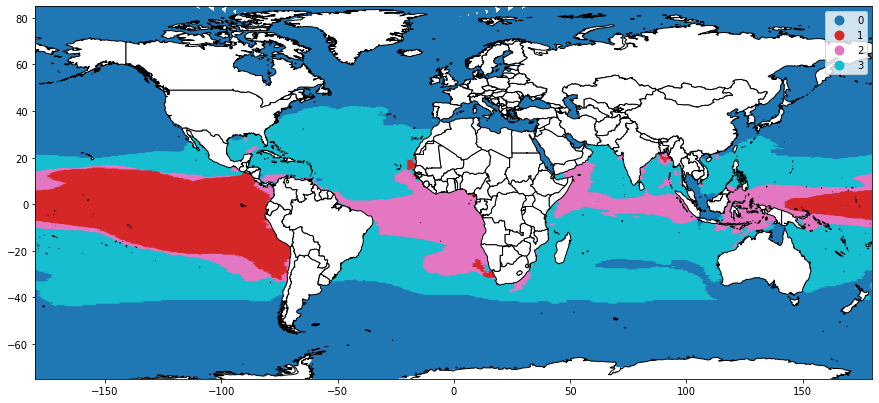

In [52]:
growth_df_global.cluster = growth_df_global.cluster.astype(str)
ax = growth_df_global.plot(column="cluster", legend=True)
global_map.plot(ax=ax, color="white", edgecolor="black")
fig = plt.gcf()
fig.set_size_inches(15,15)
ax.set_ylim(-75, 85)
ax.set_xlim(-180,180)
plt.savefig("test.png", dpi=400)

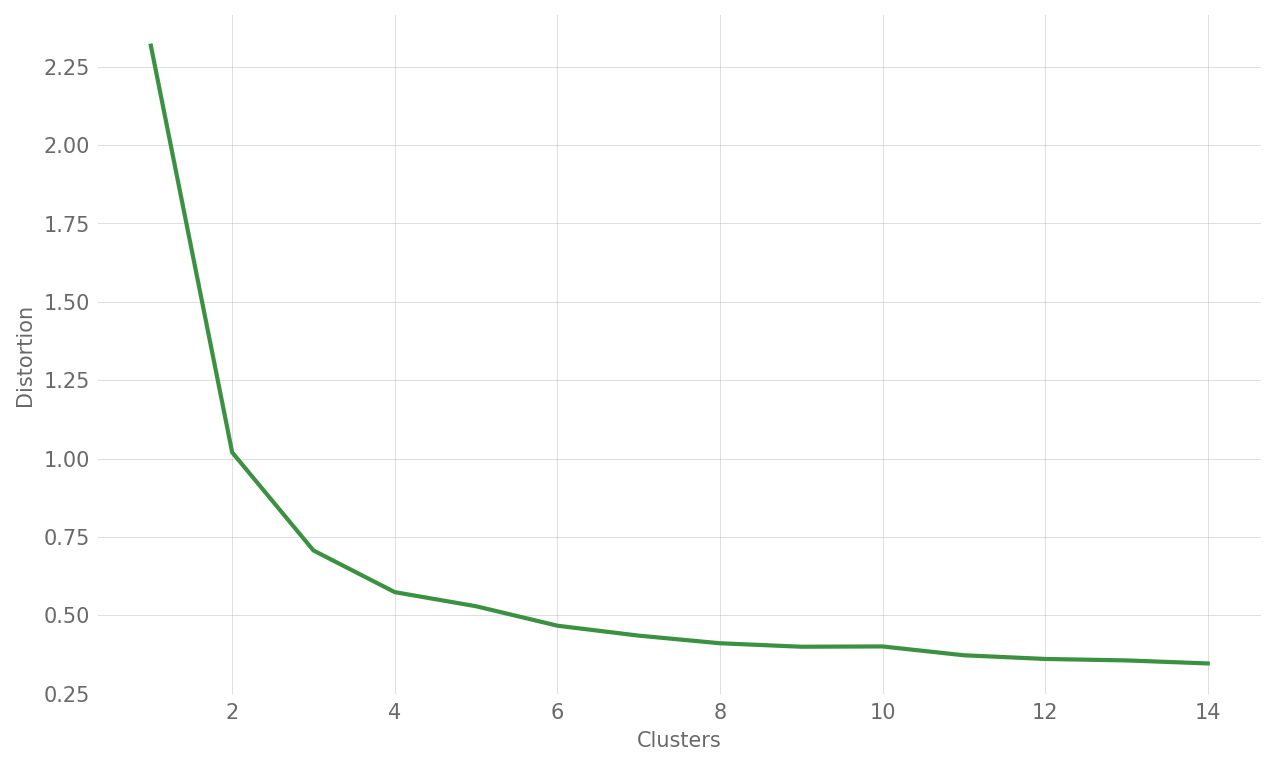

In [15]:
# Import the ALLFED stle
plt.style.use(
    "https://raw.githubusercontent.com/allfed/ALLFED-matplotlib-style-sheet/main/ALLFED.mplstyle"
)

iner = pd.read_csv("inertiasglobal.csv", sep=";")
iner.columns= ["Clusters", "Inertia"]
ax = iner.plot(x="Clusters", y="Inertia", legend=False)
ax.set_ylabel("Distortion")
fig = plt.gcf()
fig.set_size_inches(10,6)